# Logistic Regression

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)

In [2]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
import pandas as pd
pd.DataFrame(X).describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
X_train.shape, X_test.shape

((112, 4), (38, 4))

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [8]:
y_pred = classifier.predict(X_test)

In [9]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [10]:
probs_y=classifier.predict_proba(X_test)
probs_y;

In [11]:
import numpy as np
probs_y = np.round(probs_y, 2)
probs_y;

In [12]:
import numpy as np
probs_y = np.round(probs_y, 2)
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test",
                                                         "y_pred", 
                                                         "Setosa(%)",
                                                         "versicolor(%)",
                                                         "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) 
                 for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
2          | 2          | 0.0        | 0.03          | 0.97      
1          | 1          | 0.01       | 0.95          | 0.04      
0          | 0          | 1.0        | 0.0           | 0.0       
2          | 2          | 0.0        | 0.08          | 0.92      
0          | 0          | 0.98       | 0.02          | 0.0       
2          | 2          | 0.0        | 0.01          | 0.99      
0          | 0          | 0.98       | 0.02          | 0.0       
1          | 1          | 0.01       | 0.71          | 0.28      
1          | 1          | 0.0        | 0.73          | 0.27      
1          | 1          | 0.02       | 0.89          | 0.08      
2          | 2          | 0.0        | 0.44          | 0.56      
1          | 1          | 0.02       | 0.76          | 0.22      
1          | 1          | 0.01       | 0.85          | 0.13      
1       

In [13]:
classifier.score(X_test, y_test)

0.9736842105263158

# Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [16]:
df_cm = confusion_matrix(y_test, y_pred, normalize="true")
df_cm

array([[1.    , 0.    , 0.    ],
       [0.    , 0.9375, 0.0625],
       [0.    , 0.    , 1.    ]])

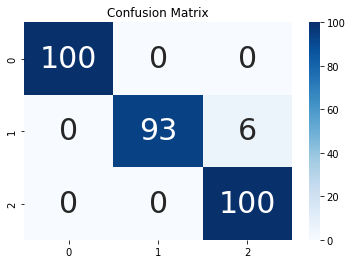

In [17]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = (confusion_matrix(y_test, y_pred, normalize="true")*100).astype(int)

sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()


# 1. Solve classification problem using 'classification.csv' dataset

In [18]:
# # example of updating one weight
# epochs = 50
# lr = 0.1
# for _ in range(epochs):
#     w1 -= lr * x1 * (y_hat - y) # y_hat is predicted value

In [19]:
import pandas as pd
default = pd.read_csv('classification.csv')
default.head(5)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,college degree,17,12,176,9.3,11.359392,5.008608,1
1,27,no high school,10,6,31,17.3,1.362202,4.000798,0
2,40,no high school,15,14,55,5.5,0.856075,2.168925,0
3,41,no high school,15,14,120,2.9,2.658720,0.821280,0
4,24,high school,2,0,28,17.3,1.787436,3.056564,1


In [20]:
pd.DataFrame(X_train)

,0,1,2,3
0,0.015440,-0.119255,0.225127,0.355798
1,-0.099845,-1.040395,0.113560,-0.029841
2,1.053005,-0.119255,0.950314,1.127075
3,-1.367980,0.341315,-1.392599,-1.315303
4,1.168290,0.111030,0.727180,1.384168
...,...,...,...,...
107,-1.137410,0.111030,-1.281032,-1.443850
108,0.476580,-0.349540,1.006098,0.741436
109,-0.099845,-0.810110,0.169343,-0.286934
110,2.090570,1.723026,1.619718,1.255621


## Implement gradient descent on logistic regression

In [21]:
import numpy as np
# binary
class Logistic_regression:
    
    def __init__(self, X, Y):
        self.X, self.Y, self.beta = X, Y, np.zeros((X.shape[1]+1, 1))
    
    def cost_function(self, beta):
        y = self.Y
        return sum([-y[i] * np.log(beta[i])-(1-y[i])*np.log(1-beta[i]) for i in range(self.Y.shape[0])]).mean()
    
    
    def fit(self, max_steps=5000, step_size=0.00005, epsilon=0.05):
        self.Y = np.array(self.Y).reshape(-1, 1)
        tmp_x = np.hstack([np.ones((self.X.shape[0], 1)), self.X])
        for i in range(max_steps):
            sigm = self.sigmoid(tmp_x)
            d_w = epsilon*(tmp_x.T @ (sigm-self.Y)) / self.Y.shape[0]
            self.beta -= step_size*d_w
        
    def predict(self, X):
        tmp_x = np.hstack([np.ones((X.shape[0], 1)), X])
        sigm = self.sigmoid(tmp_x, False)
        ans = (sigm >= 0.5).flatten()
        return [(1 if ans[i] else 0) for i in range(len(ans))]
    
    def sigmoid(self, X ,f=False):
        if f:
            print(X@self.beta)
        return 1/(1+np.exp(-(X@self.beta)))

#### visualise the date, do some EDA, find feature importance

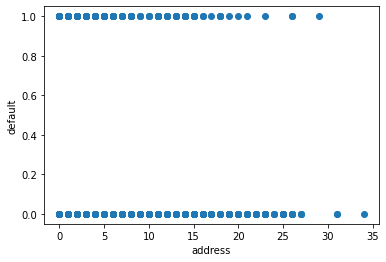

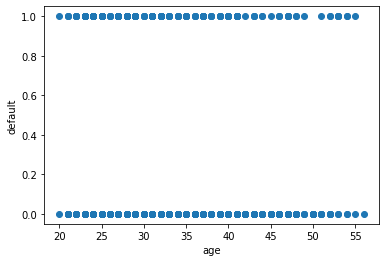

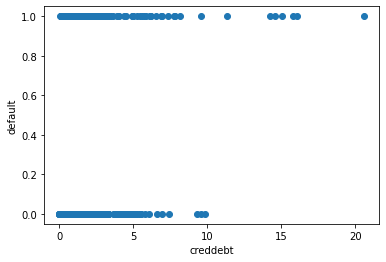

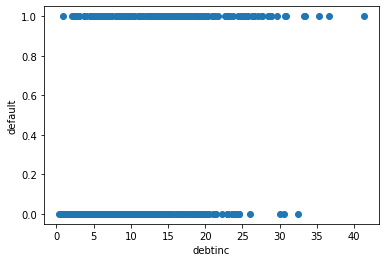

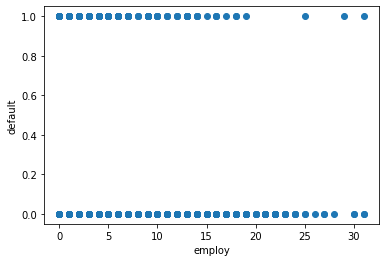

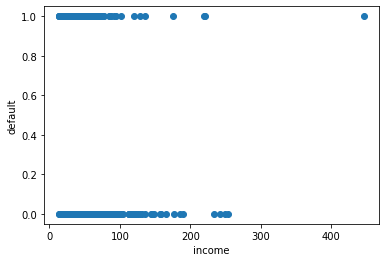

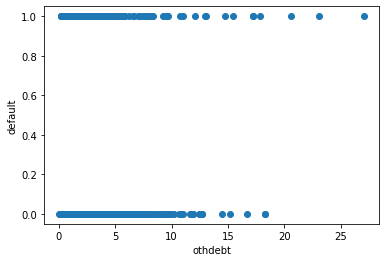

In [23]:
for feature in default.columns.difference(['default', 'ed']):
    plt.xlabel(feature)
    plt.ylabel('default')
    plt.scatter(default[feature], default.default)
    plt.show()

In [24]:
default.corr()

,age,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.536497,0.597591,0.478710,0.016398,0.295207,0.340217,-0.137657
employ,0.536497,1.000000,0.322334,0.619681,-0.031182,0.403694,0.406091,-0.282978
address,0.597591,0.322334,1.000000,0.316245,0.011323,0.208435,0.226514,-0.164451
income,0.478710,0.619681,0.316245,1.000000,-0.026777,0.570199,0.610659,-0.070970
debtinc,0.016398,-0.031182,0.011323,-0.026777,1.000000,0.501767,0.584870,0.389575
creddebt,0.295207,0.403694,0.208435,0.570199,0.501767,1.000000,0.633104,0.244740
othdebt,0.340217,0.406091,0.226514,0.610659,0.584870,0.633104,1.000000,0.145713
default,-0.137657,-0.282978,-0.164451,-0.070970,0.389575,0.244740,0.145713,1.000000


##### target variable is 'default'. Apply feature selection, feature scaling, cross validation etc. (anything you think is needed)

In [25]:
default.ed = default.ed.astype('category').cat.codes

In [26]:
from sklearn.model_selection import train_test_split
X, y = default[default.columns.difference(['default'])], default.default
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2)

#### Implement "confusion_matrix" and "f1_score" functions

In [28]:
def confusion_matrix(label, pred):
    assert(len(label) == len(pred)), "label and pred should have the same length"
    tp = len(label[label==1]==pred[pred==1])
    fp = len(label[label==1]==pred[pred==1])
    tn = len(label[label==0]==pred[pred==0])
    fn = len(label[label==1]==pred[pred==0])
    matrix = np.array([[tp, fp], [fn, tn]])
    return matrix

In [29]:
def f1_score(conf_matrix: np.array) -> float:
    assert(conf_matrix.shape == (2, 2)), 'conf_matrix shape should be (2, 2)'
    p = conf_matrix[0, 0]/(conf_matrix[0, 0]+conf_matrix[0, 1])
    r = conf_matrix[0, 0]/(conf_matrix[0, 0]+conf_matrix[1, 0])
    return 2*((p*r)/(p+r))

## Print accuracy, confusion matrix, precision, recall, sensitivity and specifity on train and test (and maybe validation) datasets.

#### Do not use any libraries for metrics, implement yourself

In [35]:
import numpy as np

def accuracy_score(conf_matrix: np.array) -> float:
    assert(conf_matrix.shape == (2, 2)), 'conf_matrix shape should be (2, 2)'
    if sum(sum(conf_matrix)) == 0:
        return conf_matrix.trace / sum(conf_matrix.flatten())
    return sum(np.diag(conf_matrix)) / sum(sum(conf_matrix))

def precision_score(conf_matrix: np.array) -> float:
    assert(conf_matrix.shape == (2, 2)), 'conf_matrix shape should be (2, 2)'
    if sum(conf_matrix[:,1]) == 0:
        return conf_matrix[0, 0]/(conf_matrix[0, 0]+conf_matrix[0, 1])
    return conf_matrix[1, 1] / sum(conf_matrix[:,1])

def recall_score(conf_matrix: np.array) -> float:
    assert(conf_matrix.shape == (2, 2)), 'conf_matrix shape should be (2, 2)'
    if sum(conf_matrix[1,:]) == 0:
        return conf_matrix[0, 0]/(conf_matrix[0, 0]+conf_matrix[1, 0])
    return conf_matrix[1, 1] / sum(conf_matrix[1,:])

sensitivity_score = recall_score

def specificity_score(conf_matrix: np.array) -> float:
    assert(conf_matrix.shape == (2, 2)), 'conf_matrix shape should be (2, 2)'
    if sum(conf_matrix[0,:]) == 0:
        return conf_matrix[1, 1]/(conf_matrix[1, 1] + conf_matrix[0, 1])
    return conf_matrix[0, 0] / sum(conf_matrix[0,:])

In [37]:
log_reg = Logistic_regression(X_train, y_train)
log_reg.fit(max_steps=10000, step_size=0.0001, epsilon=1e-14)
train_pred = log_reg.predict(X_train)
train_mat = confusion_matrix(np.array(y_train), train_pred)
print("Train Accuracy:", accuracy_score(train_mat))
print("Train Precision:", precision_score(conf_matrix=train_mat))
print("Train Recall:", recall_score(conf_matrix=train_mat))
print("Train Sensitivity:", sensitivity_score(conf_matrix=train_mat))
print("Train Specificity:", specificity_score(conf_matrix=train_mat))
print("Train F1 Score:", f1_score(conf_matrix=train_mat), end='\n\n')
test_pred = log_reg.predict(X_test)
test_mat = confusion_matrix(np.array(y_test), test_pred)

print("Test Accuracy:", accuracy_score(test_mat))
print("Test Precision:", precision_score(conf_matrix=test_mat))
print("Test Recall:", recall_score(conf_matrix=test_mat))
print("Test Sensitivity:", sensitivity_score(conf_matrix=test_mat))
print("Test Specificity:", specificity_score(conf_matrix=test_mat))
print("Test F1 Score:", f1_score(conf_matrix=test_mat))

Train Accuracy: 0.660377358490566
Train Precision: 0.7428571428571429
Train Recall: 0.7428571428571429
Train Sensitivity: 0.7428571428571429
Train Specificity: 0.5
Train F1 Score: 0.5

Test Accuracy: 0.6422018348623854
Test Precision: 0.7214285714285714
Test Recall: 0.7214285714285714
Test Sensitivity: 0.7214285714285714
Test Specificity: 0.5
Test F1 Score: 0.5
